In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import seaborn

In [2]:
StockDataset0 = pd.read_csv('MSFT.csv')

In [3]:
StockDataset0 #import OHLCV DATA for MSFT

,Date,Open,High,Low,Close,Adj_Close,Volume
0,18-02-2010,28.590000,29.030001,28.510000,28.969999,22.908892,42856500
1,19-02-2010,28.790001,28.920000,28.690001,28.770000,22.750736,44451800
2,22-02-2010,28.840000,28.940001,28.650000,28.730000,22.719110,36707100
3,23-02-2010,28.680000,28.830000,28.090000,28.330000,22.402796,52266200
4,24-02-2010,28.520000,28.790001,28.379999,28.629999,22.640034,43165900
5,25-02-2010,28.270000,28.650000,28.020000,28.600000,22.616308,48735300
6,26-02-2010,28.650000,28.850000,28.510000,28.670000,22.671663,40370600
7,01-03-2010,28.770000,29.049999,28.530001,29.020000,22.948441,43805400
8,02-03-2010,29.080000,29.299999,28.240000,28.459999,22.505596,93123900
9,03-03-2010,28.510000,28.610001,28.350000,28.459999,22.505596,48442100


In [4]:
StockDataset0.dropna(inplace = True)

In [5]:
help(plt.acorr)

Help on function acorr in module matplotlib.pyplot:

acorr(x, *, data=None, **kwargs)
    Plot the autocorrelation of *x*.
    
    Parameters
    ----------
    
    x : sequence of scalar
    
    detrend : callable, optional, default: `mlab.detrend_none`
        *x* is detrended by the *detrend* callable. Default is no
        normalization.
    
    normed : bool, optional, default: True
        If ``True``, input vectors are normalised to unit length.
    
    usevlines : bool, optional, default: True
        If ``True``, `Axes.vlines` is used to plot the vertical lines from
        the origin to the acorr. Otherwise, `Axes.plot` is used.
    
    maxlags : int, optional, default: 10
        Number of lags to show. If ``None``, will return all
        ``2 * len(x) - 1`` lags.
    
    Returns
    -------
    lags : array (length ``2*maxlags+1``)
        lag vector.
    c : array  (length ``2*maxlags+1``)
        auto correlation vector.
    line : `.LineCollection` or `.Line2D`
  

In [6]:
StockDataset0['Adj_Close']

0        22.908892
1        22.750736
2        22.719110
3        22.402796
4        22.640034
5        22.616308
6        22.671663
7        22.948441
8        22.505596
9        22.505596
10       22.640034
11       22.608398
12       22.640034
13       22.774466
14       22.908892
15       23.074961
16       23.146130
17       23.161951
18       23.225214
19       23.430805
20       23.414991
21       23.399179
22       23.407087
23       23.628510
24       23.446629
25       23.731314
26       23.454535
27       23.399179
28       23.541525
29       23.161951
           ...    
2486    158.619995
2487    159.029999
2488    157.580002
2489    160.089996
2490    162.089996
2491    161.339996
2492    163.279999
2493    162.130005
2494    163.179993
2495    166.169998
2496    167.100006
2497    166.500000
2498    165.699997
2499    166.720001
2500    165.039993
2501    162.279999
2502    165.460007
2503    168.039993
2504    172.779999
2505    170.229996
2506    174.380005
2507    180.

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.98372472, 0.98519885, 0.98676591, 0.98834715, 0.98997705,
        0.9916153 , 0.99334516, 0.99500508, 0.99665859, 0.9983065 ,
        1.        , 0.9983065 , 0.99665859, 0.99500508, 0.99334516,
        0.9916153 , 0.98997705, 0.98834715, 0.98676591, 0.98519885,
        0.98372472]),
 <matplotlib.lines.Line2D at 0x16f1bc642b0>)

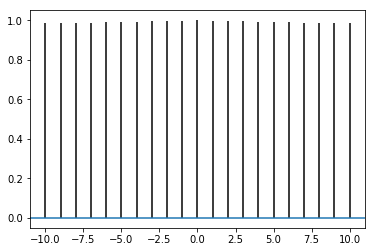

In [7]:
plt.acorr(StockDataset0['Adj_Close'])

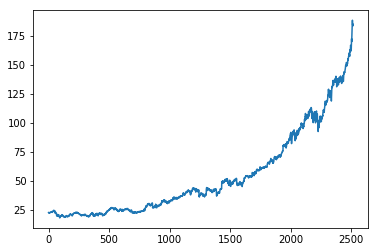

In [8]:
plt.plot(StockDataset0['Adj_Close'])

In [9]:
X = StockDataset0['Adj_Close']
adfresult = adfuller(X)
print('ADF Statistic: %f' % adfresult[0])
print('p-value: %f' % adfresult[1])
print('Critical Values:')
for key, value in adfresult[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 5.956512
p-value: 1.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [10]:
# ADF STATISTIC > Critical Value (5%) : not stationary
# no constant mean (Hence not stationarity)


In [11]:
StockDataset1=[]
for i in range(len(StockDataset0.index)):
    StockDataset1.append(StockDataset0.iloc[i,4])

In [12]:
#Differencing to get a stationary dataset
SDdiff1 = list()
for i in range(1, len(StockDataset1)):
    value = StockDataset1[i] - StockDataset1[i - 1]
    SDdiff1.append(value)


In [13]:
SDdiff1


[-0.19999899999999826,
 -0.03999999999999915,
 -0.40000000000000213,
 0.2999989999999997,
 -0.029998999999996556,
 0.07000000000000028,
 0.34999999999999787,
 -0.5600009999999997,
 0.0,
 0.16999999999999815,
 -0.03999899999999812,
 0.03999899999999812,
 0.1700000000000017,
 0.16999999999999815,
 0.21000100000000188,
 0.08999999999999986,
 0.0200010000000006,
 0.08000000000000185,
 0.25999799999999595,
 -0.019997999999997518,
 -0.0200010000000006,
 0.010000000000001563,
 0.27999899999999656,
 -0.2299989999999994,
 0.360000000000003,
 -0.3500000000000014,
 -0.07000000000000028,
 0.17999999999999972,
 -0.4799989999999994,
 -0.13000100000000003,
 0.10999999999999943,
 0.05000000000000071,
 0.030000000000001137,
 0.5700000000000003,
 0.41999999999999815,
 -0.019999999999999574,
 0.13000100000000003,
 0.36999899999999997,
 0.05000100000000174,
 -0.20000100000000032,
 0.37000099999999847,
 0.3200000000000003,
 -0.030001000000002165,
 0.059999000000001246,
 -0.4299999999999997,
 0.150002000000

In [14]:
#To Check if the new dataset is Stationary or not
X = SDdiff1
adfresult = adfuller(X)
print('ADF Statistic: %f' % adfresult[0])
print('p-value: %f' % adfresult[1])
print('Critical Values:')
for key, value in adfresult[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.856053
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [15]:
# ADF STATISTIC < Critical Value (5%) :stationary (even valid for critical value 1%)

In [16]:
StockDataset0.iloc[2,4]

28.73

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.01477057,  0.01978058, -0.08581962,  0.06716623, -0.02135335,
        -0.05397415, -0.0150354 ,  0.05661487, -0.05480241, -0.08841208,
         1.        , -0.08841208, -0.05480241,  0.05661487, -0.0150354 ,
        -0.05397415, -0.02135335,  0.06716623, -0.08581962,  0.01978058,
         0.01477057]),
 <matplotlib.lines.Line2D at 0x16f1bd3f320>)

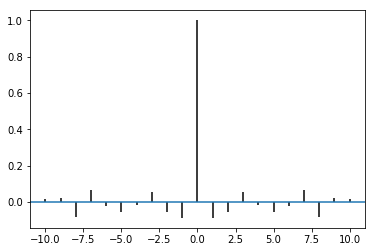

In [17]:
plt.acorr(SDdiff1)

In [18]:
StockDataset0['Date'] = StockDataset0['Date'].apply(pd.to_datetime)
StockDataset0.set_index('Date',inplace=True)


In [19]:
StockDataset0

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2010-02-18,28.590000,29.030001,28.510000,28.969999,22.908892,42856500
2010-02-19,28.790001,28.920000,28.690001,28.770000,22.750736,44451800
2010-02-22,28.840000,28.940001,28.650000,28.730000,22.719110,36707100
2010-02-23,28.680000,28.830000,28.090000,28.330000,22.402796,52266200
2010-02-24,28.520000,28.790001,28.379999,28.629999,22.640034,43165900
2010-02-25,28.270000,28.650000,28.020000,28.600000,22.616308,48735300
2010-02-26,28.650000,28.850000,28.510000,28.670000,22.671663,40370600
2010-01-03,28.770000,29.049999,28.530001,29.020000,22.948441,43805400
2010-02-03,29.080000,29.299999,28.240000,28.459999,22.505596,93123900


In [20]:
StockDataset0

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2010-02-18,28.590000,29.030001,28.510000,28.969999,22.908892,42856500
2010-02-19,28.790001,28.920000,28.690001,28.770000,22.750736,44451800
2010-02-22,28.840000,28.940001,28.650000,28.730000,22.719110,36707100
2010-02-23,28.680000,28.830000,28.090000,28.330000,22.402796,52266200
2010-02-24,28.520000,28.790001,28.379999,28.629999,22.640034,43165900
2010-02-25,28.270000,28.650000,28.020000,28.600000,22.616308,48735300
2010-02-26,28.650000,28.850000,28.510000,28.670000,22.671663,40370600
2010-01-03,28.770000,29.049999,28.530001,29.020000,22.948441,43805400
2010-02-03,29.080000,29.299999,28.240000,28.459999,22.505596,93123900


In [21]:
SDdiff1.insert(0,22.908892)
StockDataset0['Differencing']=SDdiff1

In [22]:
StockDataset0['RSI'] = talib.RSI(np.asarray(StockDataset0.Adj_Close))

In [23]:
def MACD(prices, fastperiod=12, slowperiod=26, signalperiod=9):
    '''
    Function to return the difference between the most recent 
    MACD value and MACD signal. Positive values are long
    position entry signals 

    optional args:
        fastperiod = 12
        slowperiod = 26
        signalperiod = 9

    Returns: macd - signal
    '''
    macd, signal, hist = talib.MACD(prices, 
                                    fastperiod=fastperiod, 
                                    slowperiod=slowperiod, 
                                    signalperiod=signalperiod)
    return macd[-1] - signal[-1]

In [24]:
StockDataset0['MACD'] = MACD(StockDataset0['Adj_Close'])

In [25]:
StockDataset0['MFI'] = talib.MFI(high = StockDataset0['High'], low = StockDataset0['Low'], close = StockDataset0['Adj_Close'], volume = StockDataset0['Volume'], timeperiod=14)

In [26]:
BBupperband, BBmiddleband, BBlowerband = talib.BBANDS(StockDataset0['Adj_Close'], 20, 2, 2, 0)

In [27]:
StockDataset0['BBupperband'] = BBupperband
StockDataset0['BBlowerband'] = BBlowerband
StockDataset0['BBmiddleband'] = BBmiddleband

In [68]:
def STOK(df):  
    SOk = pd.Series((df['Adj_Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    df = df.join(SOk)  
    return df

StockDataset2 = STOK(StockDataset0)
StockDataset2

,Open,High,Low,Close,Adj_Close,Volume,Differencing,RSI,MACD,MFI,BBupperband,BBlowerband,BBmiddleband,SO%k
Date,,,,,,,,,,,,,,
2010-03-17,29.500000,29.870001,29.400000,29.629999,23.430805,50385700,0.259998,62.422848,0.634068,72.618409,23.352779,22.275226,22.814003,-12.700388
2010-03-18,29.629999,29.719999,29.500000,29.610001,23.414991,43845200,-0.019998,61.851945,0.634068,65.965475,23.437769,22.240847,22.839308,-27.659258
2010-03-19,29.760000,29.900000,29.350000,29.590000,23.399179,81332100,-0.020001,61.248767,0.634068,67.905561,23.515991,22.227469,22.871730,-10.819675
2010-03-22,29.500000,29.700001,29.389999,29.600000,23.407087,37718200,0.010000,61.451240,0.634068,73.609580,23.586572,22.225686,22.906129,-19.299592
2010-03-23,29.590000,29.900000,29.410000,29.879999,23.628510,42026600,0.279999,66.698018,0.634068,80.921528,23.675706,22.259123,22.967414,-11.798959
2010-03-24,29.719999,29.850000,29.600000,29.650000,23.446629,33987700,-0.229999,59.530466,0.634068,75.144893,23.728622,22.286867,23.007744,-24.613484
2010-03-25,29.830000,30.570000,29.799999,30.010000,23.731314,73168700,0.360000,65.736953,0.634068,75.945979,23.825924,22.301065,23.063495,-7.881399
2010-03-26,30.090000,30.200001,29.590000,29.660000,23.454535,55595500,-0.350000,56.641837,0.634068,68.016649,23.860956,22.344321,23.102638,-10.058123
2010-03-29,29.709999,29.820000,29.549999,29.590000,23.399179,33336000,-0.070000,55.002760,0.634068,61.991880,23.890581,22.359769,23.125175,-22.780730


In [56]:
StockDataset2.to_csv('MSFT2.csv', header=True, index=True)

In [75]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("MSFT2.csv")
X = data.iloc[:,-7:-1]  #independent columns
y = data.iloc[:,-8]    #target column i.e price range

y = np.array(y).astype(int)
    
    
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 10 best features

          Specs         Score
3   BBupperband  1.572572e+04
5  BBmiddleband  1.502444e+04
4   BBlowerband  1.432845e+04
0           RSI  3.771305e+02
2           MFI  1.675155e+02
1          MACD  1.418054e-27
